In [1]:
# Import liabraries
import pandas as pd 
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
import squarify

In [2]:
end = dt.datetime.now () 
start = dt.date (end.year, end.month, end.day - 4)

In [3]:
components = "Genting Malaysia, IOI, IHH, RHB, Maxis, SIME Plantation, Hong Leong Bank, CIMB Group, Hong Leong Financial, Nestlé, PCHEM, Public Bank, Petronas Gas, Telekom, Malayan Banking, Genting Berhad, PPB, Sime Darby, Tenaga, Press Metal, DiGi.Com, Dialog, Hap Seng, MISC, Top Glove, Kuala Lumpur Kepong, Axiata, Petronas Dagangan, MRDIY, Hartalega"

In [4]:
# Download the share price of KLSE component companies 
df = yf.download("4715.KL 1961.KL 5225.KL 1066.KL 6012.KL 5285.KL 5819.KL 1023.KL 1082.KL 4707.KL 5183.KL 1295.KL 6033.KL 4863.KL 1155.KL 3182.KL 4065.KL 4197.KL 5347.KL 8869.KL 6947.KL 7277.KL 3034.KL 3816.KL 7113.KL 2445.KL 6888.KL 5681.KL 5296.KL 5168.KL", start, end)["Adj Close"]
df

[*********************100%***********************]  30 of 30 completed


,1023.KL,1066.KL,1082.KL,1155.KL,1295.KL,1961.KL,2445.KL,3034.KL,3182.KL,3816.KL,...,5347.KL,5681.KL,5819.KL,6012.KL,6033.KL,6888.KL,6947.KL,7113.KL,7277.KL,8869.KL
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-03,5.07,5.40,17.308001,8.00,4.04,3.87,21.240000,7.82,5.09,6.98,...,9.58,19.940001,17.98,4.58,16.40,3.82,4.2,2.49,2.87,5.53
2021-11-05,5.07,5.39,17.500000,8.01,4.03,3.85,20.700001,7.98,5.12,6.97,...,9.61,19.799999,18.02,4.70,16.42,3.86,4.3,2.48,2.83,5.46


In [5]:
# Calculate the returns 
day_ret = df.ffill().pct_change() * 100
day_ret = day_ret.dropna (axis = 0)
day_ret

,1023.KL,1066.KL,1082.KL,1155.KL,1295.KL,1961.KL,2445.KL,3034.KL,3182.KL,3816.KL,...,5347.KL,5681.KL,5819.KL,6012.KL,6033.KL,6888.KL,6947.KL,7113.KL,7277.KL,8869.KL
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-05,0.0,-0.185189,1.10931,0.125003,-0.247519,-0.516795,-2.542368,2.046034,0.589386,-0.14327,...,0.31315,-0.702113,0.222475,2.620085,0.121954,1.047119,2.380962,-0.401606,-1.393727,-1.265826


# Heat Map

In [6]:
components_split = components.split(",")

In [7]:
#create a reshaped array of ticker symbols that matches the desired shape of the heatmap
symbol = ((np.asarray(components_split)).reshape(6,5))

In [8]:
#create a reshaped array of percent returns that matches the desired shape of the heatmap
per_change = ((np.asarray(day_ret)).reshape(6,5))

In [9]:
#create a new array of the same shape as desired, combining the relevant ticker symbol
#and percentage return data
labels = (np.asarray(["{0} \n {1:.3f}".format(symbol, per_change)
                      for symbol, per_change in zip(symbol.flatten(),
                                               per_change.flatten())])).reshape(6,5)

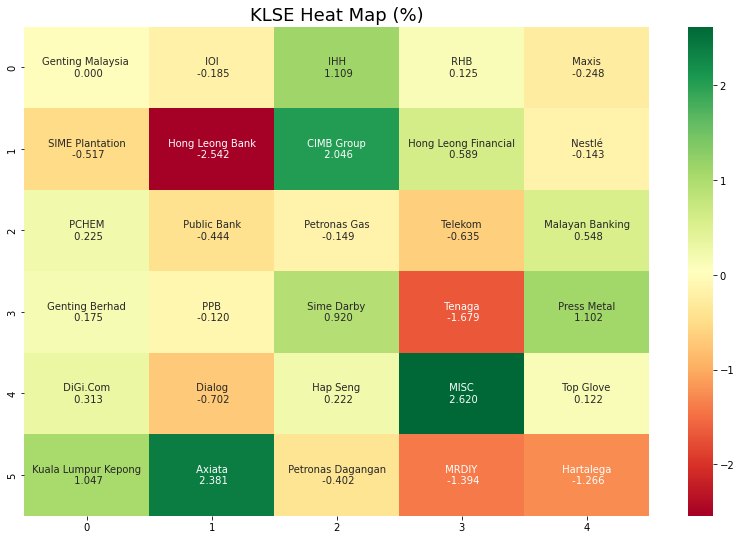

In [10]:
fig, ax = plt.subplots(figsize=(14,9))
plt.title('KLSE Heat Map (%)',fontsize=18)
ax.title.set_position([0.5,1.05])
ax.set_xticks([])
sns.heatmap(per_change, annot=labels, fmt="", cmap='RdYlGn', ax=ax)
plt.show()